# **West Roxbury**

## Objective:

To predict the value of homes in West Roxbury.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rc('figure', figsize=(15, 5))

# Data

## Get Data

In [2]:
file_name = 'datasets/WestRoxbury.csv'

dropColumns = ['TAX']

housing_df = (
    pd.read_csv(file_name)
    .rename(columns=lambda x: x.strip().replace(' ', '_'))
    .drop(columns=dropColumns)
)

rows, columns = housing_df.shape
print(f'Data successfully loaded with {rows} rows and {columns} columns.')

Data successfully loaded with 5802 rows and 13 columns.


## Clean Data

In [3]:
housing_df = pd.get_dummies(housing_df, drop_first=True)

## Explore Data

### Head

In [4]:
housing_df.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965,1880,2436,1352,2.0,6,3,1,1,1,0,0,0
1,412.6,6590,1945,3108,1976,2.0,10,4,2,1,1,0,0,1
2,330.1,7500,1890,2294,1371,2.0,8,4,1,1,1,0,0,0
3,498.6,13773,1957,5032,2608,1.0,9,5,1,1,1,1,0,0
4,331.5,5000,1910,2370,1438,2.0,7,3,2,0,1,0,0,0


### Data Types

In [5]:
housing_df.dtypes

TOTAL_VALUE       float64
LOT_SQFT            int64
YR_BUILT            int64
GROSS_AREA          int64
LIVING_AREA         int64
FLOORS            float64
ROOMS               int64
BEDROOMS            int64
FULL_BATH           int64
HALF_BATH           int64
KITCHEN             int64
FIREPLACE           int64
REMODEL_Old         uint8
REMODEL_Recent      uint8
dtype: object

### Missing Values

In [6]:
housing_df.isna().sum().sum()

0

### Unique Values

In [7]:
distinct = housing_df.nunique()
# distinct.plot.barh();
distinct

TOTAL_VALUE       2748
LOT_SQFT          3096
YR_BUILT           149
GROSS_AREA        2318
LIVING_AREA       1712
FLOORS               5
ROOMS               12
BEDROOMS             9
FULL_BATH            5
HALF_BATH            4
KITCHEN              2
FIREPLACE            5
REMODEL_Old          2
REMODEL_Recent       2
dtype: int64

### Outliers

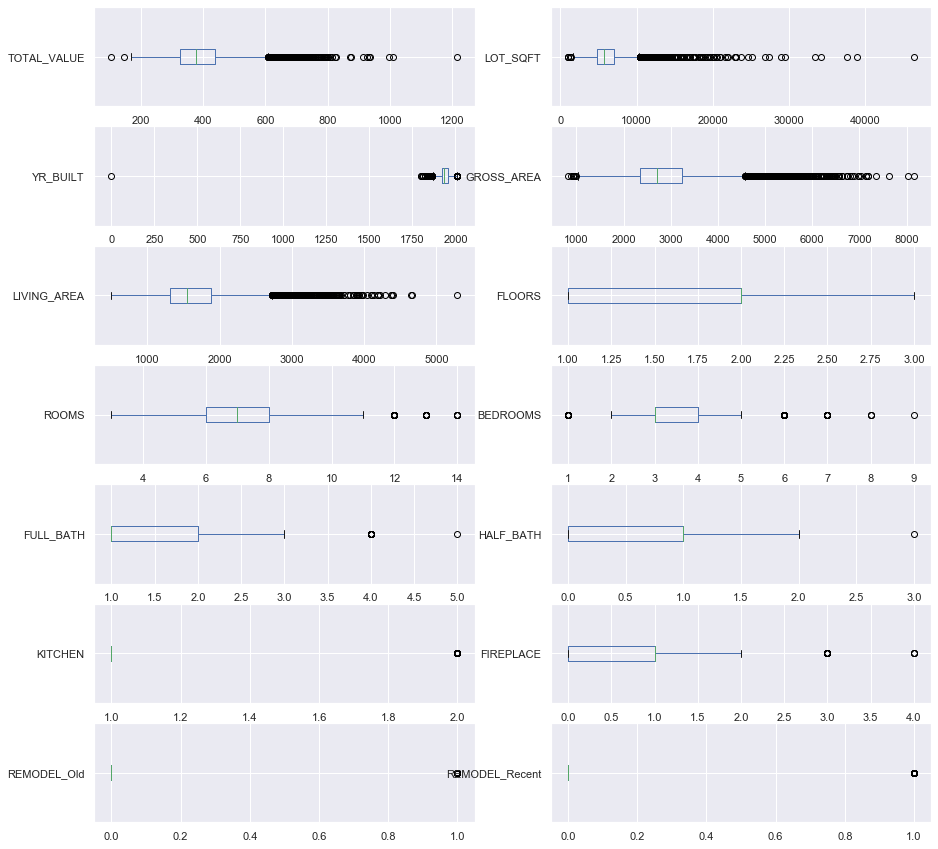

In [8]:
housing_df.plot.box(subplots=True, layout=(7,2), vert=False, figsize=(15, 15), sharex=False);

In [9]:
housing_df.LOT_SQFT.nlargest(5)

4571    46411
4036    39000
3276    37647
2727    34261
1739    33384
Name: LOT_SQFT, dtype: int64

numerical = housing_df.select_dtypes(np.number).columns
pair = sns.pairplot(data=housing_df[numerical])

# Modeling

**Task:** Predict the value of `Total_Value`

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Partition Data

In [11]:
response = 'TOTAL_VALUE'
X = housing_df.drop(response, axis=1)
y = housing_df[response]

In [12]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Fit Model

In [13]:
model = LinearRegression()
model.fit(train_X, train_y)

In [20]:
train_pred = model.predict(train_X)
train_result = pd.DataFrame({'Total_Value': train_y, 
                       'Predicted': train_pred, 
                       'Residual': train_y - train_pred})
train_result.head()

,Total_Value,Predicted,Residual
2024,392.0,387.726258,4.273742
5140,476.3,430.785540,45.514460
5259,367.4,384.042952,-16.642952
421,350.3,369.005551,-18.705551
1401,348.1,314.725722,33.374278


In [16]:
valid_pred = model.predict(valid_X)
valid_result = pd.DataFrame({'Total_Value': valid_y, 
                       'Predicted': valid_pred, 
                       'Residual': valid_y - valid_pred})
valid_result.head()

,Total_Value,Predicted,Residual
1822,462.0,406.946377,55.053623
1998,370.4,362.888928,7.511072
5126,407.4,390.287208,17.112792
808,316.1,382.470203,-66.370203
4034,393.2,434.334998,-41.134998


## Model Evaluation Matrix

In [17]:
from dmba import regressionSummary

In [18]:
regressionSummary(train_result.Total_Value, train_result.Predicted)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886


In [19]:
regressionSummary(valid_result.Total_Value, valid_result.Predicted)


Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


## New (Unseen) Data

In [22]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})

In [23]:
new_pred = model.predict(new_data)
new_pred

array([384.47210285, 378.06696706, 386.01773842])